<a href="https://colab.research.google.com/github/LucienPerret/MLDM/blob/main/L02_Linear_Regression_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
RANDOM_SEED = 0xdeadbeef

# Lab 02: Linear Regression

For the first tasks, we will work with synthetic univariate data.
We generate $100$ features $x_i \in [-1, 1]$ as `x` and two different
regression targets `y1` and `y2`.

In [4]:
data_rng = np.random.default_rng(RANDOM_SEED)
n = 100
x = 2 * data_rng.random(n) - 1  # create n points between -1 and 1

# setup synthetic y1
true_offset = 0.5
true_slope = 1.25
noise = data_rng.normal(loc=0., scale=0.25, size=(n,))

y1 = true_offset + true_slope * x + noise


# setup synthetic y2
y2  = true_offset + np.sin(np.pi * x) + noise

# Task 1: Scatter Plot

In the next cell, we show you how you can use `plt.scatter` to create scatter-plots.

A scatter plot is a graphical representation that displays individual data points based on two variables, with one variable plotted along the x-axis and the other plotted along the y-axis. It's commonly used to observe and show relationships between two numeric variables.
Plot `x` against the target variable `y1`.

The simplest way to create a scatter-plot in `matplotlib` is by calling `plt.scatter(x, y)` where `x` is a list or array of x-coordinates and `y` is a list or array of y-coordinates.

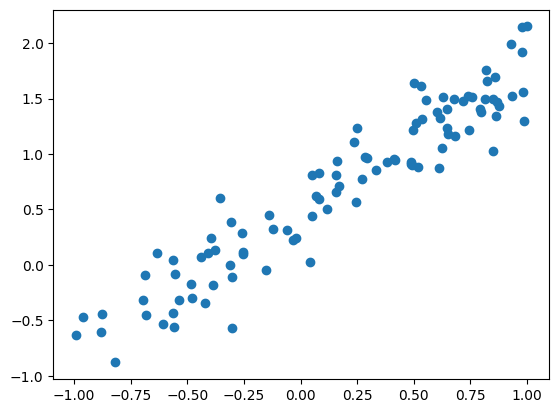

In [5]:
# Let us create a scatter-plot of x and y1
plt.scatter(x, y1)

In the next cell, we re-create the same plot but also label the axes, which is generally a good practice.

In `matplotlib` it is common to build a plot incrementally by calling many functions (such as `plt.xlabel` and `plt.ylabel` here), before displaying the result using `plt.show()`.

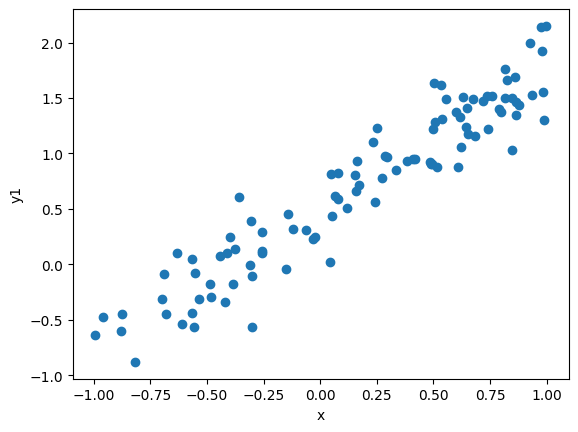

In [7]:
plt.scatter(x, y1)
plt.xlabel("x")
plt.ylabel("y1")
plt.show()

## ðŸš¨ Task 1A (1 Point) ðŸš¨

Your turn:

* create a scatter-plot of `x` and `y2`.
* Study the plot: do you think the relationship between `x` and `y2` is linear?

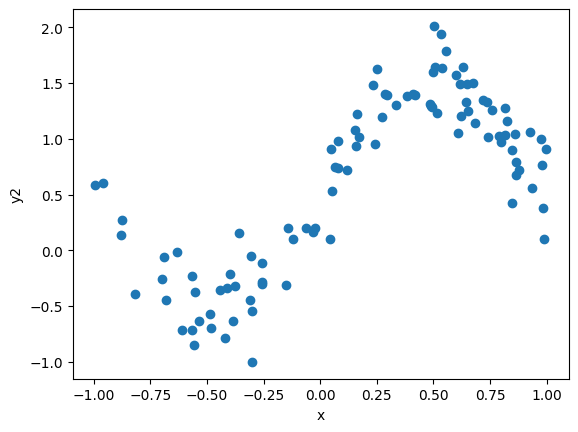

In [8]:
# TODO
plt.scatter(x, y2)
plt.xlabel("x")
plt.ylabel("y2")
plt.show()

ðŸ“¢ **<mark>On Moodle</mark>** ðŸ“¢

* Report whether the relationship between `x` and `y2` is linear.

# Task 2: Univariate Linear Regression

You will now implement Linear Regression with a single variable. In class you have seen that the underlying model is: $y = \theta_0 + \theta_1x$.

You also derived the closed formula for $\theta_0$ and $\theta_1$:

* $\hat{\theta}_1 = \frac{\sum_{i=1}^{m} (x_i - \mu(x))(y_i - \mu(y))}{\sum_{i=1}^{m}(x_i - \mu(x))^2}$
* $\hat{\theta}_0 = \mu(y) - \hat{\theta}_1\mu(x)$

## ðŸš¨ Task 2A (2 Points) ðŸš¨

In the following cell, implement the `.fit` and `.predict` methods:
* In the `.predict` method you will have to apply the model to the input `x`
* In the `.fit` method you will have to compute $\hat{\theta}_0$ and $\hat{\theta}_1$.

In [ ]:
class UnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.

  def predict(self, x):
    y_pred = ...  # TODO
    return y_pred

  def fit(self, x, y):
    # TODO
    self.theta_0 = ...
    self.theta_1 = ...

    return self

ðŸ“¢ **<mark>On Moodle</mark>**: ðŸ“¢

* Make a snapshot, or copy and submit the code you have written in the cell above.

Now we fit the linear model to `x` and the target `y1`:

* Create an instance of the class `UnivariateLinearRegression`
* fit the model using its `.fit` method
* get the predicted values, using `.predict`


In [ ]:
lin_reg_uni = UnivariateLinearRegression()
lin_reg_uni.fit(x, y1)
y_pred = lin_reg_uni.predict(x)

In the next cell, we provide a helper function to visualize your fitted linear model, based on `x`, the true values of `y` (`y_true`) and the predicted values of `y` (`y_pred`):

In [ ]:
def plot_model(x, y_pred, y_true):
  # scatter plot of the true data points
  plt.scatter(x, y_true)
  # plot the fitted line
  plt.plot(x, y_pred, c="r")
  # label axes
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

We use `plot_model` to visualize to outcome of our linear regression for `x` and `y1`.

In [ ]:
plot_model(x=x, y_pred=y_pred, y_true=y1)

Now we repeat the same steps for `x` and `y2`. Inspect the plot and reflect on your answer to Task 2A.

In [ ]:
lin_reg_uni = UnivariateLinearRegression()
lin_reg_uni.fit(x, y2)
y_pred = lin_reg_uni.predict(x)

plot_model(x, y_pred, y2)

# Task 3: Multivariate Linear Regression using the Normal Equation

In the next cell, we provide a function to generate synthetic data for
multivariate linear regression.

In [ ]:
def create_random_data(m: int, n: int, random_seed: int = RANDOM_SEED):
  """
  m: number of samples
  n: number of dimensions
  random_seed: seed to initialize random number generator
  """
  rng = np.random.default_rng(random_seed)
  # random data
  X = rng.standard_normal(size=(m, n))
  # random true model parameters
  theta = rng.standard_normal(n)
  # random noise
  noise = rng.normal(loc=0., scale=.25, size=m)
  # observed y values
  y = X @ theta + noise
  return X, y

# create synthetic dataset with 100 observations and 10 dimensions
X, y = create_random_data(100, 10)

In class you have seen that the underlying model for multivariate linear regression is: $y = X\theta$. Here $X \in \mathbb{R}^{m, n}$, $\theta \in \mathbb{R}^{n}$, and $y \in \mathbb{R}^{m}$.

We also derived a closed formula for $\theta$:

 $\hat{\theta} = (X^{T}X)^{-1}X^{T}y$

This is known as the *normal equation*.

The normal equation can be used to solve univariate and also multivariate linear regression problems, and we have shown that it yields optimal parameters.



In the next cell we implement the normal equation $\hat{\theta} = (X^{T}X)^{-1}X^{T}y$ and apply it to our data `X` and `y`.

`numpy` reminder:
* the transpose of `X` is written `X.T`
* matrix multiplication is written with the `@` symbol, e.g. `A @ B`.
* you can compute the inverse of a matrix `A` using `np.linalg.inv(A)`. However, it is more numerically stable (and yes, this can really make a difference in practice!) to use a method such as `pinv` or `solve`, as noted below.

In [ ]:
theta = (np.linalg.inv(X.T @ X) @ X.T) @ y

*Computing the matrix inverse as part of a larger expression*: when solving the normal equation, we don't actually care about the inverse $(X^{T}X)^{-1}$ by itself; rather, we care about its value <em>when multiplied by another vector</em>. In particular, the expression $(X^{T}X)^{-1}X^{T}$ is also known as the [Moore-Penrose Pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of $X$ and can be computed directly using `np.linalg.pinv(X)`, which is generally more efficient. Alternatively, you can solve the normal equation as `np.linalg.solve(X.T @ X, X.T @ y)`.

In the next cell, we provide a helper function to create a residual plot
based on the true values of `y` (`y_true`) and the predicted values of `y` (`y_pred`).

In [ ]:
def residual_plot(y_true, y_pred):
  residual = y_pred - y_true
  plt.scatter(y_true, residual)
  plt.xlabel("y")
  plt.ylabel("residual")
  plt.title("Residual Plot")
  plt.show()

Below we compute the predicted values of `y` based on the value of $\theta$ you computed using the normal equation. Then we plot the residuals using `residual_plot`.

In [ ]:
y_pred = X @ theta

residual_plot(y_true=y, y_pred=y_pred)

## Performance of Normal Equation

Max Clever has seen the slides for next lecture already â€“ where we will discuss alternative methods such as "gradient descent" for linear regression.

Now he wonders: *Why do we need other algorithms, when the normal equation solves the problem already?*

To answer this question, we will now explore how the runtime of computing the normal equation depends on the input size $n$ and $m$.

In the next cell, we provide a skeleton to measure the runtime of computing the normal equation depending on the problem size n*m.

## ðŸš¨ Task 3A (2 Point) ðŸš¨
* fill in the blanks in the code below
* run the code and explore different values for $m$. For which values of $m$ is the running time still below 30min?


In [ ]:
import time
sizes = []
times = []
n = 1000
for m in [10, 50, 100, 200, 250, 500, 1000]:
  X, y = ... # TODO create a dataset with m samples and n dimensions, we provide a helper function for this!

  start_time = time.monotonic()
  # enter the code you want to time here
  elapsed = time.monotonic() - start_time

  problem_size = ...  # TODO what is the input size of the problem

  sizes.append(problem_size)
  times.append(elapsed)

plt.scatter(sizes, times)
plt.xlabel('Problem-Size')
plt.ylabel('Runtime (s)')
plt.show()

ðŸ“¢ **<mark>On Moodle</mark>** ðŸ“¢

Answer the following question:

* Plot with different problem sizes
* Which problem size yields a running time of approximately 30 minutes?


## ðŸš¨ Task 3B (2 Point) ðŸš¨

We now explore the impact of the number of features, $n$, on the running time:

* Modify your solution to Task 3A to measure the runtime dependence on the number of features $n$ instead of the number of samples $m$.
* What happens if you use large values for $n$, e.g. $n = 100'000$?

In [ ]:
# TODO

ðŸ“¢ **<mark>On Moodle</mark>** ðŸ“¢

Answer the following question:

* Upload your plot with a "very large" maximal value for $n$.

## OPTIONAL QUESTIONS

* Do your responses to Tasks 3A and 3B change if you use `np.linalg.pinv(X)`?
* Probably your plots for number of samples $m$ and number of features $n$ look very alike. Can you explain why?

# Task 4: Multivariate Linear Regression using `scikit-learn`

In this task we will apply linear regression to non-synthetic data.
The variable `X` is a `pandas` `Dataframe` containing features and `y` contains
the target. Read through the description to get an idea of the different variables.

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)

X = data['data']
y = data['target']
description = data['DESCR']

print(description)

In the next cell, we will fit a linear regression model on this diabetes dataset
using the implementation provided by the popular `scikit-learn` library.

Their [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is contained in the `sklearn.linear_model.LinearRegression` class. The most important methods of any `sklearn` model are `.fit` and `.predict`. You will see them a lot in future labs.

The `.fit(X, y)` method trains the linear regression model and `.predict(X)` return the model's predictions for the data `X`.

You can see them in action in the next cell.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

residual_plot(y_true=y, y_pred=y_pred)

The numeric entries of the estimated parameter vector $\theta$ tell us something about the strength and direction of the relationship between the variables in `X` and the target `y`.


The estimated parameters $\theta$ of the linear model can be found in the `.coef_` member variable. The feature names can be found in the `.feature_names_in_` member variable. They are the same as the names of the columns of `X` and should be in the same order.

In the next code cell, we will plot the entries of $\theta$ paired with their corresponding feature name. We will also print out the same information.

## ðŸš¨ Task 4A (3 Points) ðŸš¨

Study the plot and printed output of the next cell and answer the following questions:

* Which are the 3 most influential features?
* How do you interpret the sign of the coefficients?
* If you had to exclude 1 feature, which one would you select and why?

In [ ]:
thetas = lin_reg.coef_
feature_names = lin_reg.feature_names_in_

plt.bar(feature_names, thetas)
plt.xticks(rotation=90)
plt.ylabel("theta")
plt.show()

print()
for th, name in zip(thetas, feature_names):
  print(f"{name}\t{th}")

ðŸ“¢ **<mark>On Moodle</mark>** ðŸ“¢

* Report your answers to the 3 questions.